# Dataset

In [3]:
!pip install -q datasets

### Load the dataset

In [4]:
from datasets import load_dataset

data = load_dataset("saudinewsnet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['source', 'url', 'date_extracted', 'title', 'author', 'content'],
        num_rows: 31030
    })
})

In [6]:
data['train'][0]

{'source': 'aawsat',
 'url': 'http://aawsat.com/home/article/410826/بريطانيا-أربعة-محاور-لاستراتيجية-جديدة-تتصدى-للتطرف-على-مدى-خمس-سنوات',
 'date_extracted': '2015-07-21 02:51:32',
 'title': 'بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى للتطرف على مدى خمس سنوات',
 'author': 'لندن: رنيم حنوش',
 'content': 'حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليوم (الاثنين)، ملامح استراتيجية للتصدي للتطرف داخل بريطانيا؛ وهي مسألة اعتبرها كاميرون "صراع جيلنا"، متعهدا خلال خطابه في مدينة بيرمنغهام بالتصدي لهؤلاء الذين ينشرون التطرف بين الشبان المسلمين البريطانيين.\n\n ورسم كاميرون الاطار العام لاستراتيجية مكافحة التطرف التي المقرر ان تنشر كاملة في وقت لاحق هذا العام، والتي تسعى للتصدي لانتشار الأفكار المتطرفة التي يروج لها متشددو تنظيم "داعش".\n\n وحسبما تناقلت وسائل الإعلام البريطانية، فإن خطة رئيس الوزراء ستكون على مدى خمسة أعوام للقضاء على التطرف الداخلي من خلال أربعة محاور، وهي: القضاء على إيديولوجية التطرف، والوقوف في وجه عمليات التجنيد وغسل الأدمغة بالأفكار المتطرفة، وإعادة اصوات الاسلام الم

In [7]:
data.set_format('pandas')

In [8]:
df = data['train'][:][['content', 'source', 'date_extracted']]
df.head()

,content,source,date_extracted
0,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,aawsat,2015-07-21 02:51:32
1,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,aawsat,2015-07-21 02:51:33
2,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,aawsat,2015-07-21 02:51:35
3,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,aawsat,2015-07-21 02:51:37
4,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,aawsat,2015-07-21 02:51:38


In [9]:
data.reset_format()

In [10]:
df = df.sample(frac=1, random_state=42)
df.head()

,content,source,date_extracted
16261,واس – جدة: تلقى خادم الحرمين الشريفين الملك س...,sabq,2015-08-01 07:51:33
28287,لفت وزير العدل أشرف ريفي في تصريح امس «انه لو...,almadina,2015-08-10 19:24:39
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح...,alriyadh,2015-08-06 01:13:10
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى...,alwatan,2015-08-10 19:44:53
2772,سبق- جدة: يقدّم الدكتور عبدالرحمن بن رجا الله...,sabq,2015-07-21 02:42:37


### Cleaning and Analysis

In [11]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import re
import pandas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
def clean_fn(text : str):
    if not isinstance(text, str):
        raise TypeError(f'You have to pass a text')
    text = re.sub('http\S+', ' رابط ', text)
    text = re.sub('\d+', ' رقم ', text)
    text = re.sub(r"([^\w\s])", r" \1 ", text)
    text = re.sub('\s+', ' ', text)

    tokens = word_tokenize(text)
    text = ' '.join([token for token in tokens if len(token)>1])

    return text.strip()

In [13]:
df['content'] = df['content'].apply(clean_fn)

In [14]:
df['content_len'] = df['content'].str.split().map(len)

In [15]:
df.head()

,content,source,date_extracted,content_len
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,143
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,341
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,184
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,452
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,117


<Axes: >

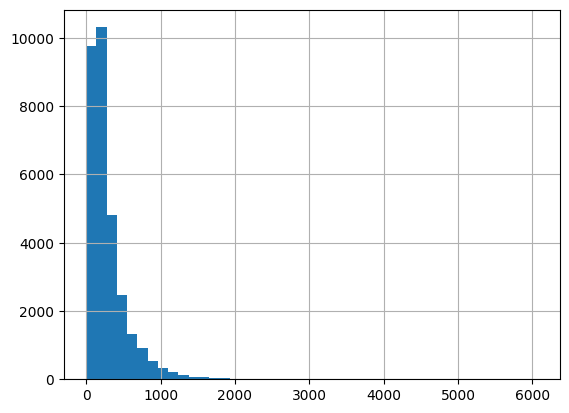

In [16]:
df['content_len'].hist(bins=44)

In [17]:
df.shape

(31030, 4)

In [18]:
df = df[df['content_len']<1000]
df.shape

(30202, 4)

In [19]:
df.drop_duplicates(['content'], inplace=True)

<ipython-input-19-5515b7e4865e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(['content'], inplace=True)


In [20]:
df['datetime'] = df['date_extracted'].astype('datetime64[ns]')

<ipython-input-20-6bc03fc2cfd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df['date_extracted'].astype('datetime64[ns]')


In [67]:
df['datetime'] = df['datetime'].apply(lambda v: v.replace(hour=0, minute=0, second=0))

In [68]:
df.head()

,content,source,date_extracted,content_len,datetime
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,143,2015-08-01
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,341,2015-08-10
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,184,2015-08-06
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,452,2015-08-10
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,117,2015-07-21


# Embedding

In [28]:
!pip install -q sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.2 MB/s eta 0:00:00


In [48]:
from sentence_transformers import SentenceTransformer

# embedding_model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"     # 512 Embedding Dim
embedding_model_id = "sentence-transformers/LaBSE"    # 768 Embedding Dim

embedding_model = SentenceTransformer(embedding_model_id, device='cuda')

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [49]:
embeddings = embedding_model.encode(df['content'].values, show_progress_bar=True)

Batches:   0%|          | 0/907 [00:00<?, ?it/s]

In [50]:
embeddings.shape

(28998, 768)

# Modelling

In [37]:
!pip install -q umap-learn hdbscan bertopic Arabic-Stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 8.1 MB/s eta 0:00:00


### Modules

In [41]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stopwords

In [1]:
# Dimensionality Reduction

umap_model = UMAP(
    n_neighbors=15, n_components=15,
    min_dist=0.0, metric='cosine',
    random_state=101
)

In [26]:
# Clustring

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.

hdbscan_model = HDBSCAN(
    min_cluster_size=50,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

In [43]:
# Bag of Words

stop_words = stopwords.stopwords_list() # len(stop_words) = 13465

vectorizer_model = CountVectorizer(
    min_df=3,
    stop_words=stop_words,
    analyzer='word',
    max_df=0.5,
    ngram_range=(1, 3)
)

### BertTopic

In [44]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

In [33]:
keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

In [51]:
topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)

In [52]:
topic_ids, confs =  topic_model.fit_transform(
    df['content'].values,
    embeddings
)

2024-03-30 21:28:09,218 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 21:28:55,471 - BERTopic - Dimensionality - Completed ✓
2024-03-30 21:28:55,476 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 21:29:02,693 - BERTopic - Cluster - Completed ✓
2024-03-30 21:29:02,705 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 21:31:14,451 - BERTopic - Representation - Completed ✓


In [53]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9141,-1_رقم مليار_بنسبة رقم رقم_رقم رقم مليار_فعاليات,"[رقم مليار, بنسبة رقم رقم, رقم رقم مليار, فعال...","[للسياحة والتراث الوطني, والتراث الوطني, الملك...",[تواصل الهيئة العامة للسياحة والتراث الوطني أع...
1,0,4068,0_القدم_النادي_اللاعب_الموسم,"[القدم, النادي, اللاعب, الموسم, اللاعبين, لكرة...","[تشيلسي, السعودي لكرة القدم, الموسم الماضي, ال...",[تلوح المنافسة حامية في الموسم الجديد من الدور...
2,1,965,1_عدن_المقاومة_الحوثيين_اليمن,"[عدن, المقاومة, الحوثيين, اليمن, الحوثي, الشعب...","[عدن, الحوثيين وقوات, محافظة عدن, مطار عدن, مد...",[أكمل ثوار المقاومة الشعبية المدعومين بقوات ال...
3,2,565,2_إيران_الاتفاق_النووي_الإيراني,"[إيران, الاتفاق, النووي, الإيراني, الاتفاق الن...","[الاتفاق النووي إيران, الاتفاق النووي الإيراني...",[قبل التوقيع على الاتفاق النووي مع إيران غالب ...
4,3,501,3_وإنشاء_البلدية_الأمانة_محطة,"[وإنشاء, البلدية, الأمانة, محطة, المرورية, رقم...","[مشروعات, المشروعات, ومشروع, وإنشاء, رقم ألف م...",[اعتمد وزير الشئون البلدية والقروية المهندس عب...
...,...,...,...,...,...,...
86,85,53,85_حرس_حرس الحدود_البحث والإنقاذ_والإنقاذ,"[حرس, حرس الحدود, البحث والإنقاذ, والإنقاذ, ال...","[فرق البحث والإنقاذ, البحث والإنقاذ, والإنقاذ,...",[باشرت فرق البحث والإنقاذ في قطاعات حرس الحدود...
87,86,51,86_نزع_نزع ملكية_ملكية_إجراءات نزع,"[نزع, نزع ملكية, ملكية, إجراءات نزع, تعويض, بد...","[رقم عقارا, وقدره رقم رقم, ملكية رقم, قدره رقم...",[عين اليوم الرياض وافق وزير الشؤون البلدية وال...
88,87,51,87_الحملة_السوريين_الوطنية السعودية_الأشقاء,"[الحملة, السوريين, الوطنية السعودية, الأشقاء, ...","[للأشقاء اللاجئين السوريين, اللاجئين السوريين,...",[أنهت الحملة الوطنية السعودية المرحلة الثالثة ...
89,88,51,88_موبايلي_خدمات الاتصالات_التجمعات_العملاء,"[موبايلي, خدمات الاتصالات, التجمعات, العملاء, ...","[خدمات الاتصالات, شركة الاتصالات السعودية, عدد...",[عبدالسلام العنزي سبق الرياض أنجزت هيئة الاتصا...


# Test

In [54]:
idx = 16
df['content'].values[idx]

'أكدت دراسة أن الأشخاص الذين يجلسون دون حركة لساعات يوميا ربما يكونون أكثر عرضة للإصابة بمرض السكري مقارنة بمن يتحركون لفترات أطول خلال اليوم وقدم الباحثون أجهزة لقياس التسارع لنحو ألفي شخص لرصد تحركاتهم خلال ساعات الاستيقاظ لنحو أسبوع وبعد خمسة أعوام وبالمقارنة مع الأشخاص الذين يجلسون لأقل من ست ساعات منذ بداية الدراسة فإن الأشخاص الذين يجلسون دون حركة لأكثر من عشر ساعات في اليوم زادت احتمالات إصابتهم بمرض السكري بواقع أربعة أمثال وبالمقارنة مع الأشخاص الذي يجلسون لأقل من ست ساعات يوميا كان الأشخاص الذين يجلسون دون حركة لأكثر من عشر ساعات يوميا أكثر عرضة للإصابة باختلال في سكر الدم الذي كثيرا ما يتطور إلى مرض السكري وقالت بيتاني بارون جيبس التي قادت الدراسة وهي باحثة في مجال الصحة والنشاط البدني في جامعة بيتسبرج `` بدأنا نؤمن أن كثرة الجلوس أمر مختلف عن عدم ممارسة الرياضة `` وقالت في رسالة بالبريد الإلكتروني `` الشخص الذي يجري لنصف ساعة يوميا ربما يجلس دون حركة لمدة رقم ساعة في العمل وفي وسائل النقل وفي المنزل وهذا الشخص ربما يصنف بأنه نشيط بدنيا لكنه كثير الجلوس أيضا ``'

In [55]:
topic_ids[idx], confs[idx]

(12, 0.8029720852775553)

In [56]:
topic_model.get_topic(idx)

[('وصاحب السمو', 0.031960269378336674),
 ('وصاحب', 0.031193587954818625),
 ('والأمير', 0.025041250360140377),
 ('وصاحب السمو الملكي', 0.02080875599237105),
 ('مجلس الوزراء', 0.020573702738969187),
 ('الاستقبال', 0.02049536522135304),
 ('سلمان عبدالعزيز', 0.01678738456855394),
 ('السمو الأمير', 0.01632217925298463),
 ('وصاحب السمو الأمير', 0.016238204638858767),
 ('جمهورية', 0.01523675336553167)]

In [76]:
df_with_topics = df.assign(topic_id=topic_ids, topic_probs=confs)
df_with_topics = df_with_topics[~df_with_topics['topic_id'].isin([-1])]
df_with_topics.head()

,content,source,date_extracted,content_len,datetime,topic_id,topic_probs
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,341,2015-08-10,31,0.299999
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,184,2015-08-06,0,1.000000
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,452,2015-08-10,18,1.000000
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,117,2015-07-21,62,1.000000
14826,من المسائل التي من الله بها على المرأة دون الر...,okaz,2015-07-31 12:21:44,203,2015-07-31,12,0.396136


In [60]:
df_with_topics[df_with_topics['topic_id']==idx]

,content,source,date_extracted,content_len,datetime,topic_id,topic_probs
6602,Next Previous عين اليوم واس استقبل خادم الحرمي...,3alyoum,2015-07-24 15:53:29,98,2015-07-24 15:53:29,16,1.000000
6625,Next Previous عين اليوم واس استقبل خادم الحرمي...,3alyoum,2015-07-24 15:54:50,156,2015-07-24 15:54:50,16,1.000000
22442,بحث الأمين العام لمنظمة التعاون الإسلامي إياد ...,alwatan,2015-08-06 08:24:36,96,2015-08-06 08:24:36,16,0.921351
29177,بيروت رقم شوال رقم هـ الموافق رقم اغسطس رقم وا...,was,2015-08-10 20:27:41,43,2015-08-10 20:27:41,16,1.000000
6632,Next Previous عين اليوم واس استقبل خادم الحرمي...,3alyoum,2015-07-24 15:55:11,164,2015-07-24 15:55:11,16,0.836167
...,...,...,...,...,...,...,...
22301,حطت طائرة ولي ولي العهد النائب الثاني لرئيس مج...,alwatan,2015-08-06 01:18:39,561,2015-08-06 01:18:39,16,0.606442
11151,استقبل صاحب السمو الشيخ تميم بن حمد آل ثاني أم...,alyaum,2015-07-26 16:52:42,170,2015-07-26 16:52:42,16,1.000000
699,التقى الأمير محمد بن سلمان بن عبدالعزيز ولي ول...,aleqtisadiya,2015-07-21 02:48:00,150,2015-07-21 02:48:00,16,0.739242
30306,فاجأ وزير الخارجية عادل الجبير الحاضرين في مؤت...,alwatan,2015-08-11 14:03:48,68,2015-08-11 14:03:48,16,1.000000


# Visualizations

In [61]:
topic_model.visualize_topics()

In [62]:
topic_model.visualize_heatmap()

In [64]:
topics_per_class = topic_model.topics_per_class(
    df['content'].values,
    classes=df['source'].values
)

14it [00:33,  2.37s/it]


In [65]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=20)

In [69]:
topics_over_time = topic_model.topics_over_time(
    df['content'].values,
    df['datetime'].values
)

18it [01:53,  6.28s/it]


In [70]:
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
)

# Topic Merge

In [72]:
hierarchical_topics = topic_model.hierarchical_topics(
    df['content'].values
)

100%|██████████| 89/89 [00:01<00:00, 81.74it/s]


In [73]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

In [74]:
topics_to_merge = [
    [15, 60, 4],
    [30, 23, 7]
]

topic_model.merge_topics(
    df['content'].values,
    topics_to_merge
)

In [75]:
hierarchical_topics = topic_model.hierarchical_topics(
    df['content'].values
)

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

100%|██████████| 85/85 [00:01<00:00, 81.03it/s]


# Inference

In [77]:
story = """
طرحت مؤسسة البترول الكويتية عطاءً؛ لبيع زيت وقود عالي الكبريت للتحميل في الفترة من فبراير/ شباط إلى إبريل/ نيسان.
وأوضحت مصادر تجارية، اليوم الخميس، أن المؤسسة تعرض شحنات من زيت الوقود عالي الكبريت تبلغ الواحدة 60 ألف طن لتحميلها من الكويت شهرياً بالفترة المذكورة.
"""

topic, prob =  topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-30 22:16:01,370 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-03-30 22:16:28,615 - BERTopic - Dimensionality - Completed ✓
2024-03-30 22:16:28,619 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-03-30 22:16:28,625 - BERTopic - Cluster - Completed ✓


In [78]:
topic, prob

([10], array([0.55902096]))

In [80]:
topic_model.get_topic(topic[0])

[('النفط', 0.057011596748349255),
 ('برميل', 0.03278230660092555),
 ('الخام', 0.028988170806543815),
 ('للبرميل', 0.025018111190819828),
 ('رقم دولار', 0.021340103491923838),
 ('أسعار النفط', 0.02057662674405833),
 ('رقم رقم دولار', 0.02022959076658169),
 ('مليون برميل', 0.018991612801036936),
 ('برميل يوميا', 0.01808124182009968),
 ('رقم مليون برميل', 0.0175409051901415)]

# Save and Load

In [81]:
topic_model.save(
    "bertopic",
    serialization="safetensors",
    save_ctfidf=True,
    save_embedding_model=embedding_model_id
)

In [82]:
topic_model = BERTopic.load("bertopic")